In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import glob
import re

In [54]:
import NegativeClassOptimization.config as config

In [32]:
from NegativeClassOptimization.preprocessing import onehot_encode_df

In [33]:
ONE_VS_ALL_PATH = Path('../data/full_data/1_vs_all')
PAIRWISE_HIGH_PATH = Path('../data/full_data/high_pairwise')
HIGH_LOW_PATH = Path('../data/full_data/high_low_concat')

In [34]:
def get_eigenval_cov(file_path, only_binber = False, only_nonbind = False):
    df = pd.read_csv(file_path, sep='\t')
    df = df[df['Train'] == True]
    if only_binber:
        df = df[df['binder'] == True]
    if only_nonbind:
        df = df[df['binder'] == False]
    df = onehot_encode_df(df)
    X_transp = np.stack(df['Slide_onehot'].values)
    X = X_transp.T
    data_cov = np.matmul(X, X_transp)/X.shape[1]#X.shape[1] # changed positions of X XT/X.shape[1] 220x220
    w,v = np.linalg.eig(data_cov)
    w[::-1].sort()
    #print(np.linalg.norm(data_cov)*np.linalg.norm(np.linalg.inv(data_cov)))
    return w

In [36]:
w_1_vs_all, cov_1all= get_eigenval_cov(ONE_VS_ALL_PATH / '1ADQ_vs_all.tsv')
w_pairwise_high, cov_pw = get_eigenval_cov(PAIRWISE_HIGH_PATH / '1ADQ_1FBI_highs.tsv')
w_high_low, cov_hl = get_eigenval_cov(HIGH_LOW_PATH / '1ADQ_high_low.tsv');

<AxesSubplot:>

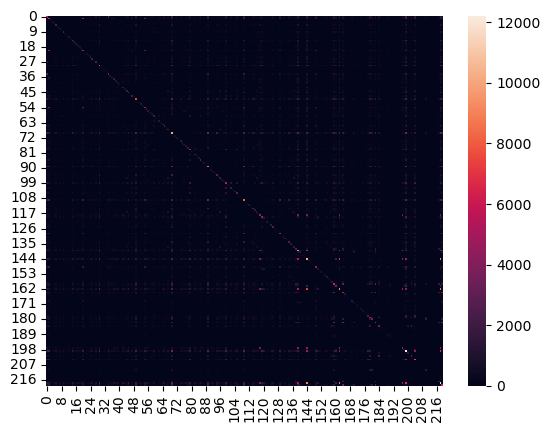

In [30]:
sns.heatmap(cov_1all)

<AxesSubplot:>

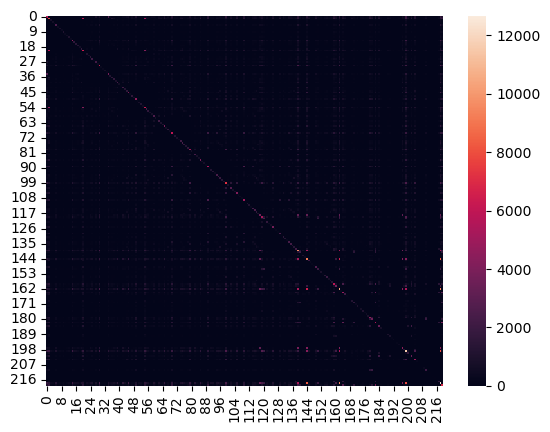

In [32]:
sns.heatmap(cov_hl)

In [48]:
n_index = w_1_vs_all.shape[0]

/opt/homebrew/anaconda3/envs/nco/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/homebrew/anaconda3/envs/nco/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/homebrew/anaconda3/envs/nco/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


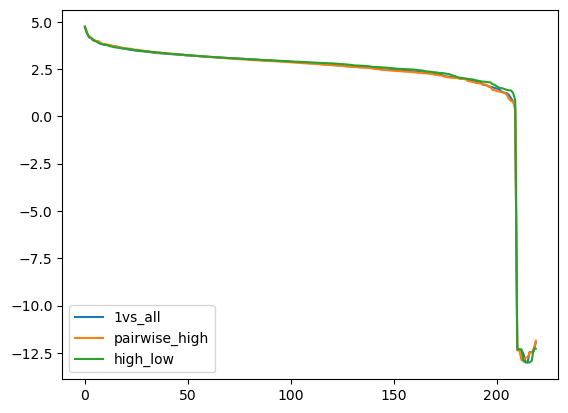

In [14]:
sns.lineplot(y = np.log10(w_1_vs_all) , x =np.arange(w_1_vs_all.shape[0]), label = '1vs_all')
sns.lineplot(y = np.log10(w_pairwise_high), x =np.arange(w_pairwise_high.shape[0]), label = 'pairwise_high')
sns.lineplot(y = np.log10(w_high_low), x =np.arange(w_high_low.shape[0]), label = 'high_low');
#plot.legend()

/opt/homebrew/anaconda3/envs/nco/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/homebrew/anaconda3/envs/nco/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/homebrew/anaconda3/envs/nco/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'Eigenvalues')

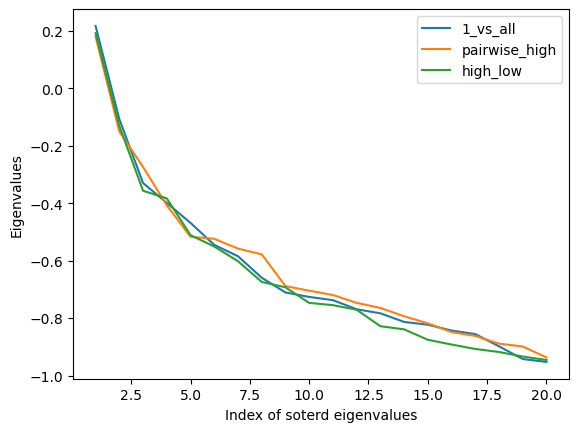

In [40]:
sns.lineplot(y = np.log10(w_1_vs_all[:20]) , x =np.arange(1,20+1), label = '1_vs_all')
sns.lineplot(y = np.log10(w_pairwise_high[:20]), x =np.arange(1,20+1), label = 'pairwise_high')
sns.lineplot(y = np.log10(w_high_low[:20]), x =np.arange(1,20+1), label = 'high_low');
plt.xlabel('Index of soterd eigenvalues')
plt.ylabel('Eigenvalues')
plt.savefig('./plots/eigenvalues.png')

/opt/homebrew/anaconda3/envs/nco/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/homebrew/anaconda3/envs/nco/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/homebrew/anaconda3/envs/nco/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


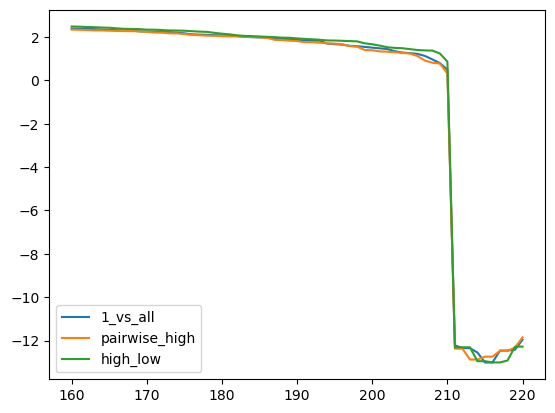

In [58]:
sns.lineplot(y = np.log10(w_1_vs_all[159:]) , x =np.arange(160,221), label = '1_vs_all')
sns.lineplot(y = np.log10(w_pairwise_high[159:]), x =np.arange(160,221), label = 'pairwise_high')
sns.lineplot(y = np.log10(w_high_low[159:]), x =np.arange(160,221), label = 'high_low');

In [27]:
#Mesure for each antigen 
files_high_low = glob.glob(str(Path(HIGH_LOW_PATH)) + '/*high_low.tsv')


In [29]:
eigen_tuples= []
for file in files_high_low:
    w = get_eigenval_cov(file, only_nonbind = True)
    file_name = file.split("/")[-1]
    ag = re.match('(\d[A-Z0-9]+)_', file_name).group(1)
    eigen_tuples.append((ag,w))

/var/folders/ww/bptfq9n12_jbyy78qcjp7s4c0000gn/T/ipykernel_66827/2405439089.py:2: RuntimeWarning: divide by zero encountered in log10
  sns.lineplot(y = np.log10(w) , x =np.arange(1, 221), label = ag)
/opt/homebrew/anaconda3/envs/nco/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/homebrew/anaconda3/envs/nco/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/homebrew/anaconda3/envs/nco/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/homebrew/anaconda3/envs/nco/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, fl

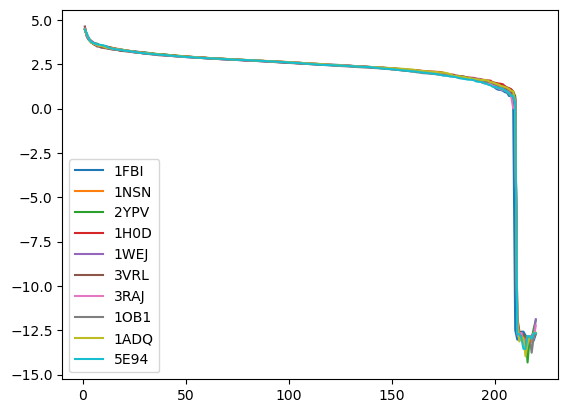

In [31]:
for ag, w in eigen_tuples:
    sns.lineplot(y = np.log10(w) , x =np.arange(1, 221), label = ag)


In [124]:
eigen_tuples_binders= []
for file in files_high_low:
    w = get_eigenval_cov(file, only_binber=True)
    file_name = file.split("/")[-1]
    ag = re.match('(\d[A-Z0-9]+)_', file_name).group(1)
    eigen_tuples_binders.append((ag,w))

/opt/homebrew/anaconda3/envs/nco/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/homebrew/anaconda3/envs/nco/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/homebrew/anaconda3/envs/nco/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/homebrew/anaconda3/envs/nco/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/homebrew/anaconda3/envs/nco/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, fl

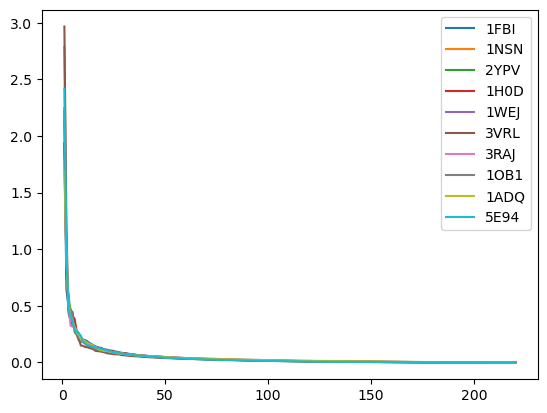

In [125]:
for ag, w in eigen_tuples_binders:
    sns.lineplot(y = w , x =np.arange(1, 221), label = ag)

In [ ]:
#Collec all test data possible
#high_low collect all

In [41]:
antigens = ['3VRL', '1NSN', '3RAJ', '5E94', '1H0D', '1WEJ', '1ADQ', '1FBI','2YPV', '1OB1']  

In [42]:
list_dfs = []
for ag in antigens:
    list_dfs.append(pd.read_csv(HIGH_LOW_PATH/f'{ag}_high_low.tsv', sep='\t'))
all_slidef_df = pd.concat(list_dfs, ignore_index=True)

In [43]:
X_transp = np.stack(onehot_encode_df(all_slidef_df)['Slide_onehot'].values)
X = X_transp.T
data_cov = np.matmul(X, X_transp)/X.shape[1]
w,v = np.linalg.eig(data_cov)

In [44]:
all_pos_train = sorted(w[::-1], reverse=True)

/opt/homebrew/anaconda3/envs/nco/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/homebrew/anaconda3/envs/nco/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/homebrew/anaconda3/envs/nco/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/homebrew/anaconda3/envs/nco/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


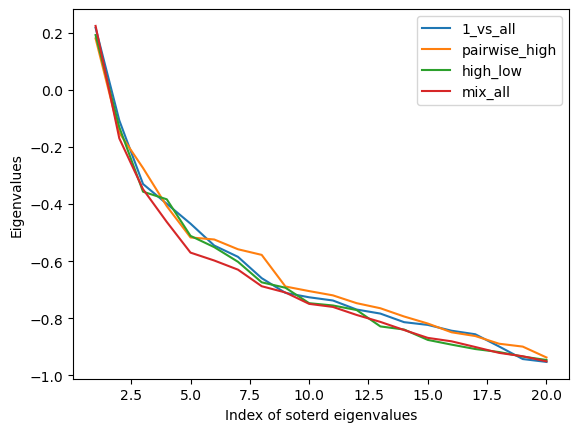

In [51]:
sns.lineplot(y = np.log10(w_1_vs_all[:20]) , x =np.arange(1,20+1), label = '1_vs_all')
sns.lineplot(y = np.log10(w_pairwise_high[:20]), x =np.arange(1,20+1), label = 'pairwise_high')
sns.lineplot(y = np.log10(w_high_low[:20]), x =np.arange(1,20+1), label = 'high_low')
sns.lineplot(y = np.log10(all_pos_train[:20]), x =np.arange(1,20+1), label = 'mix_all')
plt.xlabel('Index of soterd eigenvalues')
plt.ylabel('Eigenvalues')
plt.savefig('./plots/eigenvalues.png')

/opt/homebrew/anaconda3/envs/nco/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/homebrew/anaconda3/envs/nco/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/homebrew/anaconda3/envs/nco/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/homebrew/anaconda3/envs/nco/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


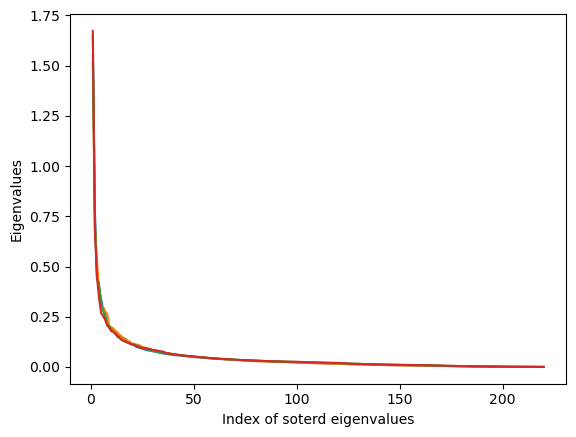

In [52]:
sns.lineplot(y = w_1_vs_all , x =np.arange(1,n_index+1))
sns.lineplot(y = w_pairwise_high, x =np.arange(1,n_index+1))
sns.lineplot(y = w_high_low, x =np.arange(1,n_index+1))
sns.lineplot(y = all_pos_train, x =np.arange(1,n_index+1))
plt.xlabel('Index of soterd eigenvalues')
plt.ylabel('Eigenvalues')
plt.savefig('./plots/eigenvalues_zoom_out.png')

In [55]:
#huge df
path_div2class = 'full_data/divided2classes'
list_big_df = []
for antigen in antigens:
    df_a_non_binder = pd.read_csv(glob.glob(str(Path(config.DATA_BASE_PATH / path_div2class)) + f'/*{antigen}*Analyses/*{antigen}_*_500kNonMascotte.txt')[0], sep='\t', header=[1])
    df_a_binder = pd.read_csv(glob.glob(str(Path(config.DATA_BASE_PATH / path_div2class)) + f'/*{antigen}*Analyses/*{antigen}_*_Mascotte.txt')[0], sep='\t', header=[1])
    list_big_df.append(df_a_non_binder['Slide'])
    list_big_df.append(df_a_binder['Slide'])

In [56]:
big_df = pd.concat(list_big_df, axis = 0)

In [61]:
big_df = pd.DataFrame(big_df, columns = ['Slide'])

In [62]:
big_df.head()

,Slide
0,GLGRFWYFDVW
1,DMITTRYFDYW
2,RPYGSRSFDYW
3,AISRVTTPHYW
4,YYYGSGGFAYW


In [63]:
X_transp = np.stack(onehot_encode_df(big_df)['Slide_onehot'].values)
X = X_transp.T
data_cov = np.matmul(X, X_transp)/X.shape[1]
w_big,v_big = np.linalg.eig(data_cov)

In [64]:
big_eigen= sorted(w_big[::-1], reverse=True)

/opt/homebrew/anaconda3/envs/nco/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/homebrew/anaconda3/envs/nco/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/homebrew/anaconda3/envs/nco/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/homebrew/anaconda3/envs/nco/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/homebrew/anaconda3/envs/nco/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, fl

Text(0, 0.5, 'Eigenvalues')

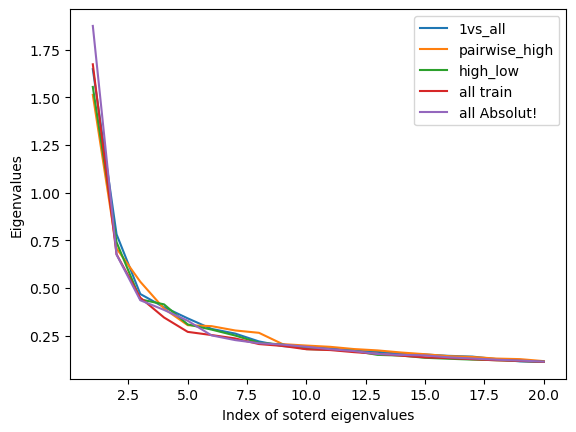

In [69]:
sns.lineplot(y = w_1_vs_all[:20] , x =np.arange(1,20+1), label = '1vs_all')
sns.lineplot(y = w_pairwise_high[:20], x =np.arange(1,20+1), label = 'pairwise_high' )
sns.lineplot(y = w_high_low[:20], x =np.arange(1,20+1),label = 'high_low')
sns.lineplot(y = all_pos_train[:20], x =np.arange(1,20+1),label = 'all train')
sns.lineplot(y = big_eigen[:20], x =np.arange(1,20+1), label = 'all Absolut!')
plt.xlabel('Index of soterd eigenvalues')
plt.ylabel('Eigenvalues')
#plt.savefig('./plots/eigenvalues_zoom_out.png')